In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
from matplotlib.widgets import Button
import plotly.express as px
import os
import plotly.express as px
import statsmodels.api as sm
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
import arviz as az

# Research Question 2

## Using GLM model to explore how geography and asthma prevalence are related

# Frequentist

In [2]:
#load the dataset and select useful columns for our research question
#DataValue = number of asthma cases per 10,000 people, Stratification 1 = description of the individuals included in DataValue, Question = description 

data= pd.read_csv("Asthma.csv")
asthma = data[['YearStart', 'LocationAbbr', 'DataValue', 'Question', 'StratificationCategory1', 'Stratification1']]
asthma = asthma.dropna()
asthma.head()

,YearStart,LocationAbbr,DataValue,Question,StratificationCategory1,Stratification1
0,2014,AR,916.0,Hospitalizations for asthma,Gender,Male
1,2018,CO,2227.0,Hospitalizations for asthma,Overall,Overall
2,2018,DC,708.0,Hospitalizations for asthma,Overall,Overall
3,2017,GA,3520.0,Hospitalizations for asthma,Gender,Female
4,2010,MI,123.0,Hospitalizations for asthma,Race/Ethnicity,Hispanic


In [7]:
asthma['Question'].unique()

array(['Hospitalizations for asthma', 'Asthma mortality rate',
       'Emergency department visit rate for asthma',
       'Asthma prevalence among women aged 18-44 years',
       'Current asthma prevalence among adults aged >= 18 years',
       'Influenza vaccination among noninstitutionalized adults aged >= 65 years with asthma',
       'Influenza vaccination among noninstitutionalized adults aged 18-64 years with asthma',
       'Pneumococcal vaccination among noninstitutionalized adults aged 18-64 years with asthma',
       'Pneumococcal vaccination among noninstitutionalized adults aged >= 65 years with asthma'],
      dtype=object)

In [3]:
# Per our research question, we are selecting for rows that show 'Current asthma prevalence among adults aged >= 18 years'
# Per our EDA, we are selecting for 2012 > Year > 2019 to get the bulk of the data
# We plan to explore StratificationCategory = 'Overall' and StratificationCategory = 'Gender', starting with 'Overall'

asthma_filtered = asthma[asthma['Question'] == 'Current asthma prevalence among adults aged >= 18 years']
asthma_Overall = asthma_filtered[(asthma_filtered['YearStart'] > 2012) & (asthma_filtered['YearStart'] < 2019) &  (asthma_filtered['StratificationCategory1'] == 'Overall')]
asthma_Male = asthma_filtered[(asthma_filtered['YearStart'] > 2012) & (asthma_filtered['YearStart'] < 2019) &  (asthma_filtered['StratificationCategory1'] == 'Gender') & (asthma_filtered['Stratification1'] == 'Male')]
asthma_Female = asthma_filtered[(asthma_filtered['YearStart'] > 2012) & (asthma_filtered['YearStart'] < 2019) &  (asthma_filtered['StratificationCategory1'] == 'Gender') & (asthma_filtered['Stratification1'] == 'Female')]

In [4]:
# Mapping the states to their respective regions

state_to_region = {
    'AK': 'West',
    'AL': 'South',
    'AR': 'South',
    'AZ': 'West',
    'CA': 'West',
    'CO': 'West',
    'CT': 'Northeast',
    'DE': 'South',
    'FL': 'South',
    'GA': 'South',
    'HI': 'West',
    'IA': 'Midwest',
    'ID': 'West',
    'IL': 'Midwest',
    'IN': 'Midwest',
    'KS': 'Midwest',
    'KY': 'South',
    'LA': 'South',
    'MA': 'Northeast',
    'MD': 'South',
    'ME': 'Northeast',
    'MI': 'Midwest',
    'MN': 'Midwest',
    'MO': 'Midwest',
    'MS': 'South',
    'MT': 'West',
    'NC': 'South',
    'ND': 'Midwest',
    'NE': 'Midwest',
    'NH': 'Northeast',
    'NJ': 'Northeast',
    'NM': 'West',
    'NV': 'West',
    'NY': 'Northeast',
    'OH': 'Midwest',
    'OK': 'South',
    'OR': 'West',
    'PA': 'Northeast',
    'RI': 'Northeast',
    'SC': 'South',
    'SD': 'Midwest',
    'TN': 'South',
    'TX': 'South',
    'UT': 'West',
    'VA': 'South',
    'VT': 'Northeast',
    'WA': 'West',
    'WI': 'Midwest',
    'WV': 'South',
    'WY': 'West'
}

asthma_Overall['Region'] = asthma_Overall['LocationAbbr'].map(state_to_region)
asthma_Male['Region'] = asthma_Male['LocationAbbr'].map(state_to_region)
asthma_Female['Region'] = asthma_Female['LocationAbbr'].map(state_to_region)
asthma_Female.head()

/tmp/ipykernel_660/2811514614.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asthma_Overall['Region'] = asthma_Overall['LocationAbbr'].map(state_to_region)
/tmp/ipykernel_660/2811514614.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  asthma_Male['Region'] = asthma_Male['LocationAbbr'].map(state_to_region)
/tmp/ipykernel_660/2811514614.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the 

,YearStart,LocationAbbr,DataValue,Question,StratificationCategory1,Stratification1,Region
28954,2017,AK,11.4,Current asthma prevalence among adults aged >=...,Gender,Female,West
29092,2014,AK,11.0,Current asthma prevalence among adults aged >=...,Gender,Female,West
29539,2015,AK,12.5,Current asthma prevalence among adults aged >=...,Gender,Female,West
29575,2014,AK,11.0,Current asthma prevalence among adults aged >=...,Gender,Female,West
29657,2017,AK,11.4,Current asthma prevalence among adults aged >=...,Gender,Female,West


## Asthma Overall

In [5]:
# One-hot encoding the region column to feed into the GLM

dummy_df = pd.get_dummies(asthma_Overall['Region'])
asthma_GLM = pd.concat([asthma_Overall, dummy_df], axis = 1)
asthma_GLM.head()

,YearStart,LocationAbbr,DataValue,Question,StratificationCategory1,Stratification1,Region,Midwest,Northeast,South,West
28974,2015,AK,9.2,Current asthma prevalence among adults aged >=...,Overall,Overall,West,0,0,0,1
29179,2015,AK,9.3,Current asthma prevalence among adults aged >=...,Overall,Overall,West,0,0,0,1
29180,2013,AK,9.4,Current asthma prevalence among adults aged >=...,Overall,Overall,West,0,0,0,1
29234,2017,AK,8.4,Current asthma prevalence among adults aged >=...,Overall,Overall,West,0,0,0,1
29448,2016,AK,9.0,Current asthma prevalence among adults aged >=...,Overall,Overall,West,0,0,0,1


In [6]:
# Splitting our data into training and test sets and selecting relevant columns

train, test = train_test_split(asthma_GLM, test_size=0.3, random_state=101)
test2 = test[['DataValue', 'YearStart', 'Midwest', 'Northeast', 'South', 'West']]

In [7]:
# Fit the model into a GLM wit Poisson and log link function

model_Overall = sm.GLM(train['DataValue'], sm.add_constant(train[['YearStart', 'Midwest', 'Northeast', 'South', 'West']]), family=sm.families.Poisson(link=sm.families.links.log()))
results_Overall = model_Overall.fit()

print(results_Overall.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              DataValue   No. Observations:                  455
Model:                            GLM   Df Residuals:                      449
Model Family:                 Poisson   Df Model:                            5
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -969.72
Date:                Thu, 04 May 2023   Deviance:                       82.733
Time:                        13:04:37   Pearson chi2:                     81.5
No. Iterations:                     4   Pseudo R-squ. (CS):            0.03738
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -15.1347     18.324     -0.826      0.4

In [8]:
# quantifying uncertainty in the GLM model by printing model confidence intervals

conf_ints = results_Overall.conf_int()
print(conf_ints)

                   0          1
const     -51.049273  20.779778
YearStart  -0.009213   0.026428
Midwest    -0.132599   0.121167
Northeast   0.023955   0.286467
South      -0.138332   0.111758
West       -0.122413   0.133555


In [9]:
# Fitting the model to our test set and obtaining rmse to compare with the nonparametric method

from sklearn.metrics import mean_squared_error

test_pred = results_Overall.predict(test2)
rmse = np.sqrt(mean_squared_error(test2['DataValue'], test_pred))
print('RMSE: ', rmse)


RMSE:  9.394005180610309


## Asthma Male

In [10]:
# One-hot encoding the region column to feed into the GLM

dummy_df = pd.get_dummies(asthma_Male['Region'])
asthma_GLM_Male = pd.concat([asthma_Male, dummy_df], axis = 1)
asthma_GLM_Male.head()

,YearStart,LocationAbbr,DataValue,Question,StratificationCategory1,Stratification1,Region,Midwest,Northeast,South,West
29002,2014,AK,5.5,Current asthma prevalence among adults aged >=...,Gender,Male,West,0,0,0,1
29048,2013,AK,6.4,Current asthma prevalence among adults aged >=...,Gender,Male,West,0,0,0,1
29116,2018,AK,5.6,Current asthma prevalence among adults aged >=...,Gender,Male,West,0,0,0,1
29141,2016,AK,5.8,Current asthma prevalence among adults aged >=...,Gender,Male,West,0,0,0,1
29163,2016,AK,5.7,Current asthma prevalence among adults aged >=...,Gender,Male,West,0,0,0,1


In [11]:
# Splitting our data into training and test sets and selecting relevant columns

train_Male, test_Male = train_test_split(asthma_GLM_Male, test_size=0.3, random_state=101)
test2Male = test_Male[['DataValue', 'YearStart', 'Midwest', 'Northeast', 'South', 'West']]

In [12]:
# Fit the model into a GLM wit Poisson and log link function

model_Male = sm.GLM(train_Male['DataValue'], sm.add_constant(train_Male[['YearStart', 'Midwest', 'Northeast', 'South', 'West']]), family=sm.families.Poisson(link=sm.families.links.log()))
results_Male = model_Male.fit()

print(results_Male.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              DataValue   No. Observations:                  453
Model:                            GLM   Df Residuals:                      447
Model Family:                 Poisson   Df Model:                            5
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -893.57
Date:                Thu, 04 May 2023   Deviance:                       81.916
Time:                        13:04:37   Pearson chi2:                     81.2
No. Iterations:                     4   Pseudo R-squ. (CS):            0.02490
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.0294     21.001     -0.430      0.6

In [13]:
# quantifying uncertainty in the GLM model by printing model confidence intervals

conf_ints_Male = results_Male.conf_int()
print(conf_ints)

                   0          1
const     -51.049273  20.779778
YearStart  -0.009213   0.026428
Midwest    -0.132599   0.121167
Northeast   0.023955   0.286467
South      -0.138332   0.111758
West       -0.122413   0.133555


In [14]:
# Fitting the model to our test set and obtaining rmse to compare with the nonparametric method

test_pred_Male = results_Male.predict(test2Male)
rmse_Male = np.sqrt(mean_squared_error(test2Male['DataValue'], test_pred_Male))
print('RMSE: ', rmse_Male)

RMSE:  6.55061555142398


## Asthma Female 

In [15]:
# One-hot encoding the region column to feed into the GLM

dummy_df = pd.get_dummies(asthma_Female['Region'])
asthma_GLM_Female = pd.concat([asthma_Female, dummy_df], axis = 1)
asthma_GLM_Female.head()

,YearStart,LocationAbbr,DataValue,Question,StratificationCategory1,Stratification1,Region,Midwest,Northeast,South,West
28954,2017,AK,11.4,Current asthma prevalence among adults aged >=...,Gender,Female,West,0,0,0,1
29092,2014,AK,11.0,Current asthma prevalence among adults aged >=...,Gender,Female,West,0,0,0,1
29539,2015,AK,12.5,Current asthma prevalence among adults aged >=...,Gender,Female,West,0,0,0,1
29575,2014,AK,11.0,Current asthma prevalence among adults aged >=...,Gender,Female,West,0,0,0,1
29657,2017,AK,11.4,Current asthma prevalence among adults aged >=...,Gender,Female,West,0,0,0,1


In [16]:
# Splitting our data into training and test sets and selecting relevant columns

train_Female, test_Female = train_test_split(asthma_GLM_Female, test_size=0.3, random_state=101)
test2Female = test_Female[['DataValue', 'YearStart', 'Midwest', 'Northeast', 'South', 'West']]

In [17]:
# Fit the model into a GLM wit Poisson and log link function

model_Female = sm.GLM(train_Female['DataValue'], sm.add_constant(train_Female[['YearStart', 'Midwest', 'Northeast', 'South', 'West']]), family=sm.families.Poisson(link=sm.families.links.log()))
results_Female = model_Female.fit()

print(results_Female.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              DataValue   No. Observations:                  455
Model:                            GLM   Df Residuals:                      449
Model Family:                 Poisson   Df Model:                            5
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1032.0
Date:                Thu, 04 May 2023   Deviance:                       98.067
Time:                        13:04:38   Pearson chi2:                     96.3
No. Iterations:                     4   Pseudo R-squ. (CS):            0.04539
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -15.8363     16.195     -0.978      0.3

In [18]:
# quantifying uncertainty in the GLM model by printing model confidence intervals

conf_ints_Female = results_Female.conf_int()
print(conf_ints_Female)

                   0          1
const     -47.578429  15.905820
YearStart  -0.006675   0.024824
Midwest    -0.129438   0.098972
Northeast   0.034831   0.268970
South      -0.109030   0.115268
West       -0.105545   0.123697


In [19]:
# Fitting the model to our test set and obtaining rmse to compare with the nonparametric method

test_pred_Female = results_Female.predict(test2Female)
rmse_Female = np.sqrt(mean_squared_error(test2Female['DataValue'], test_pred_Female))
print('RMSE: ', rmse_Female)

RMSE:  11.977104226023318


# Bayesian

## Asthma Overall

In [20]:
asthma_Bayesian = asthma_GLM
asthma_Bayesian.head()

,YearStart,LocationAbbr,DataValue,Question,StratificationCategory1,Stratification1,Region,Midwest,Northeast,South,West
28974,2015,AK,9.2,Current asthma prevalence among adults aged >=...,Overall,Overall,West,0,0,0,1
29179,2015,AK,9.3,Current asthma prevalence among adults aged >=...,Overall,Overall,West,0,0,0,1
29180,2013,AK,9.4,Current asthma prevalence among adults aged >=...,Overall,Overall,West,0,0,0,1
29234,2017,AK,8.4,Current asthma prevalence among adults aged >=...,Overall,Overall,West,0,0,0,1
29448,2016,AK,9.0,Current asthma prevalence among adults aged >=...,Overall,Overall,West,0,0,0,1


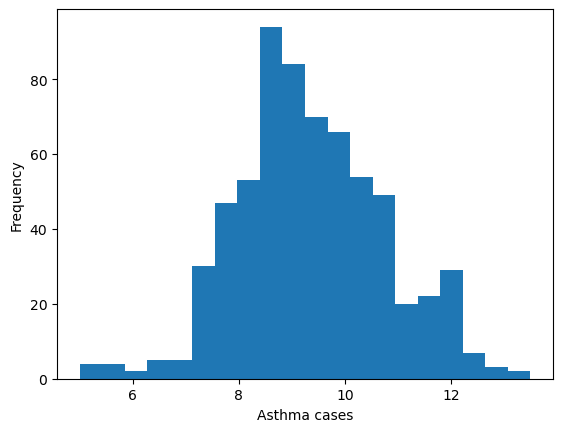

1.3865673077415726 9.34476923076923


In [21]:
# exploring the DataValue column to determine a prior distribution

plt.hist(asthma_Bayesian['DataValue'], bins=20)
plt.xlabel('Asthma cases')
plt.ylabel('Frequency')
plt.show()

print(asthma_Bayesian['DataValue'].std(), np.mean(asthma_Bayesian['DataValue']))      

In [22]:
import pymc3 as pm
# Define variables
Year = asthma_Bayesian['YearStart']
Asthma_Cases = asthma_Bayesian['DataValue']
South = asthma_Bayesian['South']
West = asthma_Bayesian['West']
Midwest = asthma_Bayesian['Midwest']
Northeast = asthma_Bayesian['Northeast']

# Specify model
with pm.Model() as model:
    # Priors
    alpha = pm.Normal('alpha', mu=0, sd=10)
    beta_south = pm.Beta('beta_south', alpha=1, beta=1)
    beta_west = pm.Beta('beta_west', alpha=1, beta=1)
    beta_midwest = pm.Beta('beta_midwest', alpha=1, beta=1)
    beta_northeast = pm.Beta('beta_northeast', alpha=1, beta=1)
    sigma = pm.Exponential('sigma', lam=1)

    # Linear combination of predictors
    mu = alpha + beta_south * South + beta_west * West + beta_midwest * Midwest + beta_northeast * Northeast

    # Likelihood
    y_obs = pm.Normal('y_obs', mu=mu, sd=sigma, observed=Asthma_Cases)

    # Sampling
    trace = pm.sample(2000, tune=2000)

/tmp/ipykernel_660/633568200.py:27: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(2000, tune=2000)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, beta_northeast, beta_midwest, beta_west, beta_south, alpha]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 12 seconds.


In [25]:
# Calculate posterior distribution of y_obs
sigma_reshaped = trace['sigma'][:, np.newaxis]
y_post = trace['alpha'] + trace['beta_south']*np.array(South).reshape(650, 1) + trace['beta_west']*np.array(West).reshape(650,1) + trace['beta_midwest']*np.array(Midwest).reshape(650,1) + trace['beta_northeast']*np.array(Northeast).reshape(650,1) 

# Calculate 95% credible interval
lower = np.percentile(y_post, 2.5)
upper = np.percentile(y_post, 97.5)

print(f"The credible interval has a lower bound of {lower} and an upper bound of {upper}")

The credible interval has a lower bound of 9.055074774459014 and an upper bound of 10.15706705345499


In [26]:
pm.summary(trace)

Got error No model on context stack. trying to find log_likelihood in translation.
/opt/conda/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,9.121,0.059,9.006,9.225,0.001,0.001,5063.0,4139.0,1.0
beta_south,0.060,0.050,0.000,0.153,0.001,0.001,4561.0,3344.0,1.0
beta_west,0.137,0.089,0.000,0.288,0.001,0.001,3874.0,2140.0,1.0
beta_midwest,0.056,0.049,0.000,0.147,0.001,0.001,3626.0,2852.0,1.0
beta_northeast,0.971,0.028,0.919,1.000,0.000,0.000,4439.0,2677.0,1.0
sigma,1.288,0.036,1.222,1.356,0.000,0.000,5745.0,4806.0,1.0


Got error No model on context stack. trying to find log_likelihood in translation.
/opt/conda/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
Got error No model on context stack. trying to find log_likelihood in translation.
/opt/conda/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.
/opt/conda

<AxesSubplot:title={'center':'sigma'}>

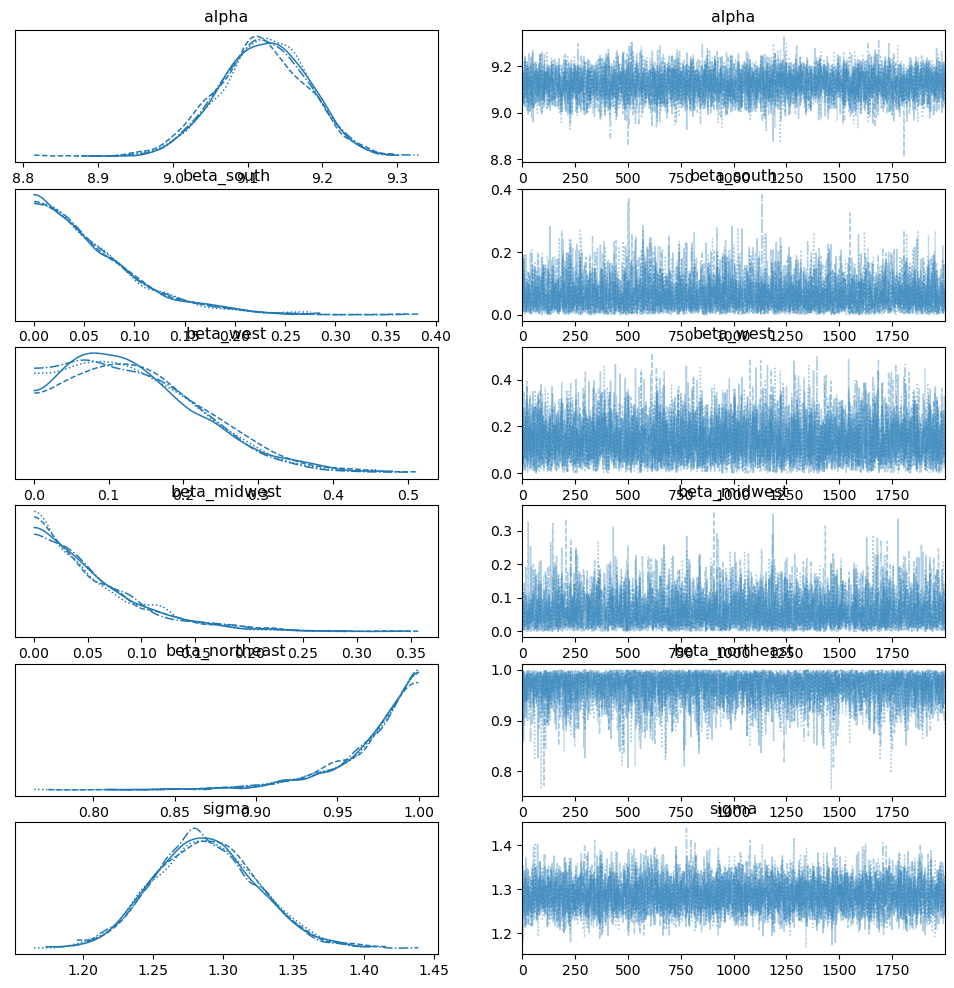

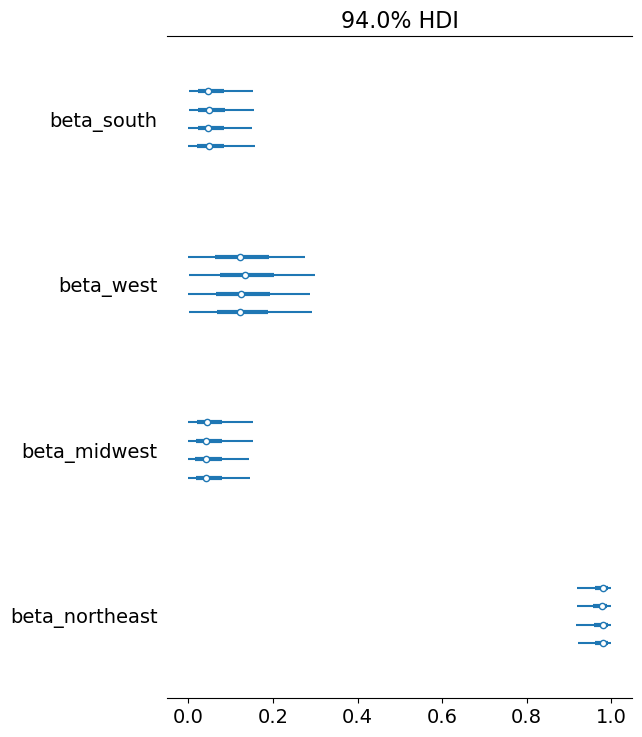

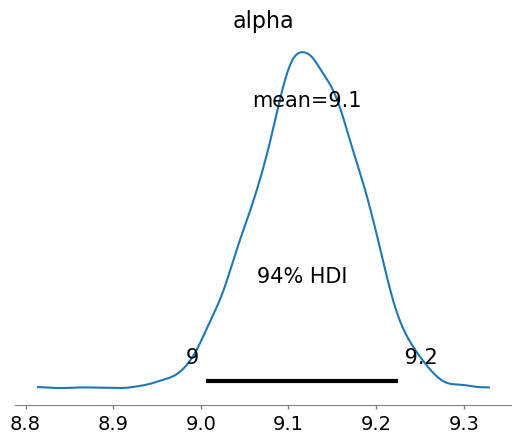

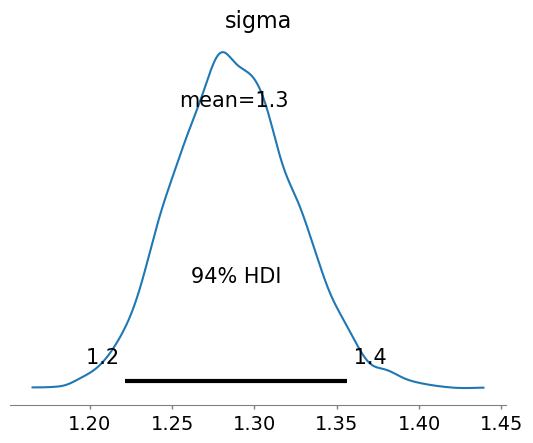

In [27]:
# Analyze results
az.summary(trace)

az.plot_trace(trace)

az.plot_forest(trace, var_names=['beta_south', 'beta_west', 'beta_midwest', 'beta_northeast'])

az.plot_posterior(trace, var_names=['alpha'])

pm.plot_posterior(trace, var_names=['sigma'])

## Asthma Male

In [28]:
asthma_Bayesian_Male = asthma_GLM_Male
asthma_Bayesian_Male.head()

,YearStart,LocationAbbr,DataValue,Question,StratificationCategory1,Stratification1,Region,Midwest,Northeast,South,West
29002,2014,AK,5.5,Current asthma prevalence among adults aged >=...,Gender,Male,West,0,0,0,1
29048,2013,AK,6.4,Current asthma prevalence among adults aged >=...,Gender,Male,West,0,0,0,1
29116,2018,AK,5.6,Current asthma prevalence among adults aged >=...,Gender,Male,West,0,0,0,1
29141,2016,AK,5.8,Current asthma prevalence among adults aged >=...,Gender,Male,West,0,0,0,1
29163,2016,AK,5.7,Current asthma prevalence among adults aged >=...,Gender,Male,West,0,0,0,1


In [29]:
# Define variables
Year = asthma_Bayesian_Male['YearStart']
Asthma_Cases = asthma_Bayesian_Male['DataValue']
South = asthma_Bayesian_Male['South']
West = asthma_Bayesian_Male['West']
Midwest = asthma_Bayesian_Male['Midwest']
Northeast = asthma_Bayesian_Male['Northeast']

# Specify model
with pm.Model() as model:
    # Priors
    alpha = pm.Normal('alpha', mu=0, sd=10)
    beta_south = pm.Beta('beta_south', alpha=1, beta=1)
    beta_west = pm.Beta('beta_west', alpha=1, beta=1)
    beta_midwest = pm.Beta('beta_midwest', alpha=1, beta=1)
    beta_northeast = pm.Beta('beta_northeast', alpha=1, beta=1)
    sigma = pm.Exponential('sigma', lam=1)

    # Linear combination of predictors
    mu = alpha + beta_south * South + beta_west * West + beta_midwest * Midwest + beta_northeast * Northeast

    # Likelihood
    y_obs = pm.Normal('y_obs', mu=mu, sd=sigma, observed=Asthma_Cases)

    # Sampling
    trace = pm.sample(2000, tune=2000)

/tmp/ipykernel_660/4099450721.py:26: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(2000, tune=2000)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, beta_northeast, beta_midwest, beta_west, beta_south, alpha]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 12 seconds.


In [30]:
pm.summary(trace)

Got error No model on context stack. trying to find log_likelihood in translation.
/opt/conda/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,6.409,0.062,6.290,6.525,0.001,0.001,3347.0,3019.0,1.0
beta_south,0.040,0.036,0.000,0.106,0.001,0.000,4210.0,3452.0,1.0
beta_west,0.305,0.108,0.106,0.510,0.002,0.001,4060.0,3295.0,1.0
beta_midwest,0.172,0.097,0.001,0.333,0.002,0.001,3269.0,2619.0,1.0
beta_northeast,0.954,0.042,0.877,1.000,0.001,0.000,4394.0,2629.0,1.0
sigma,1.117,0.031,1.060,1.175,0.000,0.000,5149.0,4698.0,1.0


In [31]:
# Calculate posterior distribution of y_obs
sigma_reshaped = trace['sigma'][:, np.newaxis]
y_post = trace['alpha'] + trace['beta_south']*np.array(South).reshape(648, 1) + trace['beta_west']*np.array(West).reshape(648,1) + trace['beta_midwest']*np.array(Midwest).reshape(648,1) + trace['beta_northeast']*np.array(Northeast).reshape(648,1) 

# Calculate 95% credible interval
lower = np.percentile(y_post, 2.5)
upper = np.percentile(y_post, 97.5)

print(f"The credible interval has a lower bound of {lower} and an upper bound of {upper}")

The credible interval has a lower bound of 6.345823822530016 and an upper bound of 7.431687208406522


Got error No model on context stack. trying to find log_likelihood in translation.
/opt/conda/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
Got error No model on context stack. trying to find log_likelihood in translation.
/opt/conda/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.
/opt/conda

<AxesSubplot:title={'center':'sigma'}>

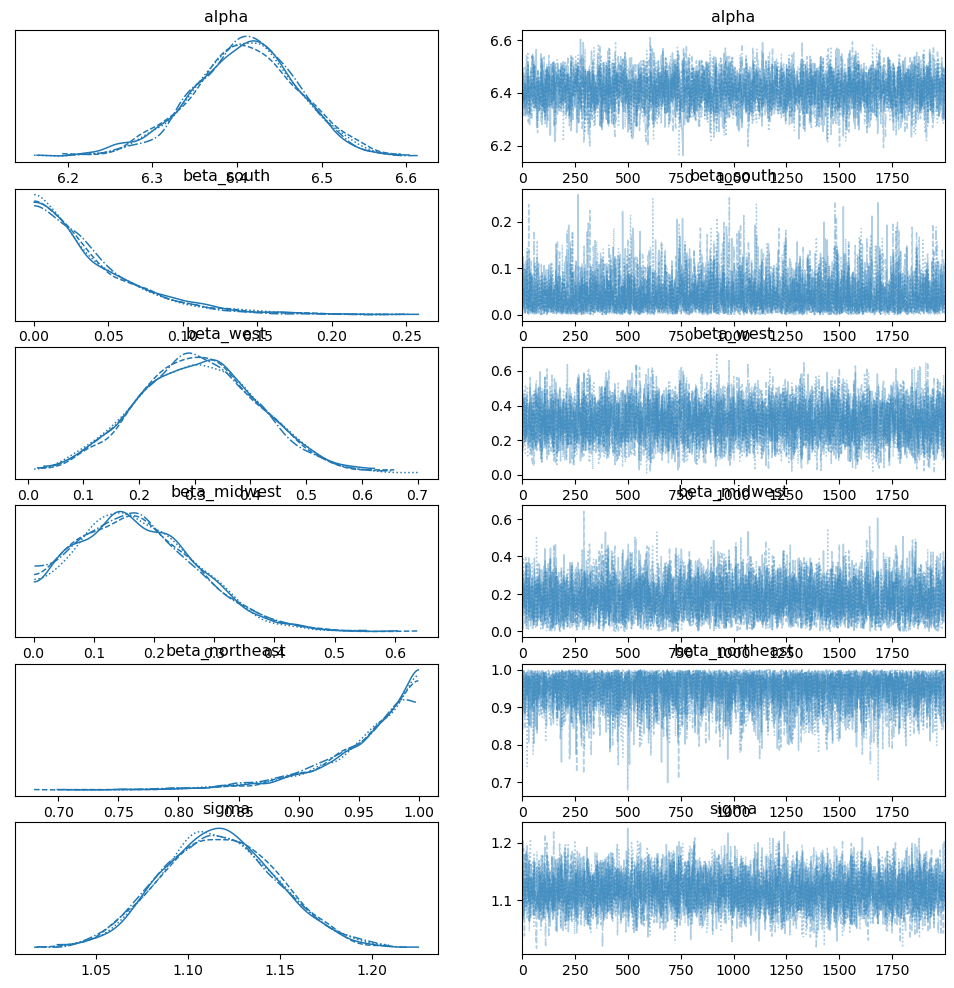

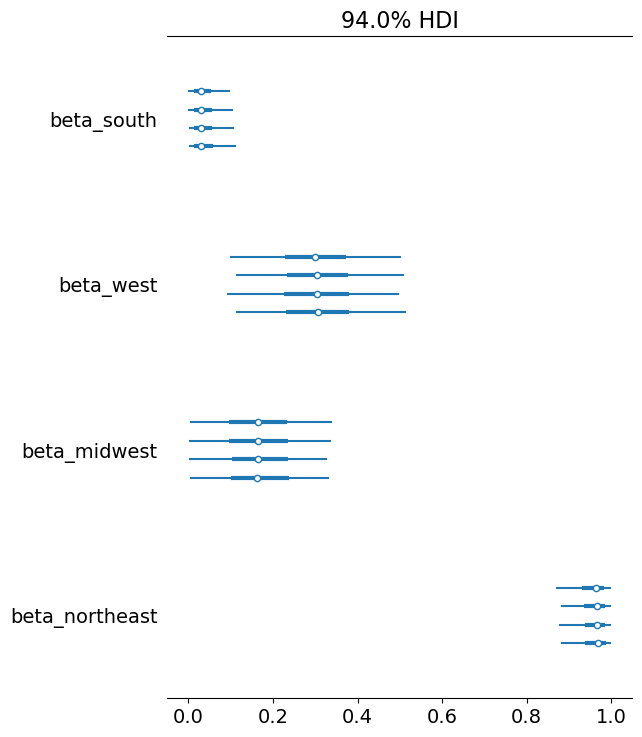

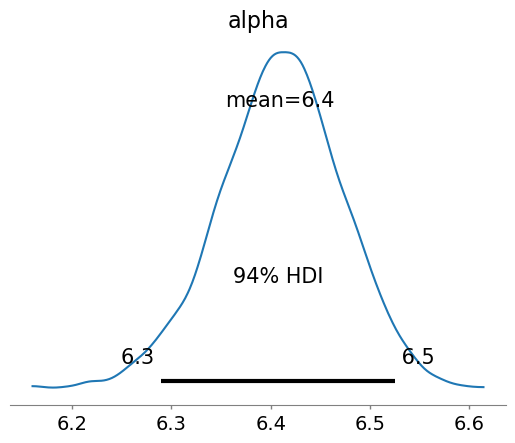

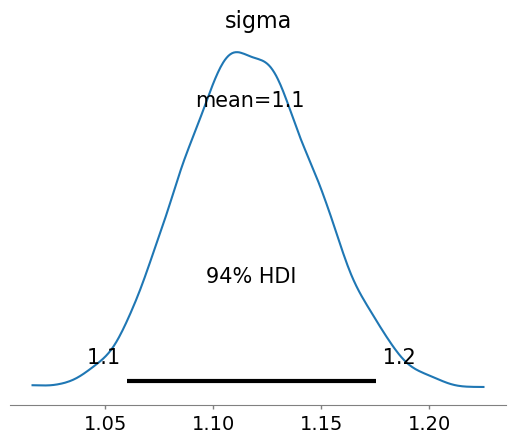

In [32]:
# Analyze results
az.summary(trace)

az.plot_trace(trace)

az.plot_forest(trace, var_names=['beta_south', 'beta_west', 'beta_midwest', 'beta_northeast'])

az.plot_posterior(trace, var_names=['alpha'])

pm.plot_posterior(trace, var_names=['sigma'])

## Asthma Female

In [33]:
asthma_Bayesian_Female = asthma_GLM_Female
asthma_Bayesian_Female.head()

,YearStart,LocationAbbr,DataValue,Question,StratificationCategory1,Stratification1,Region,Midwest,Northeast,South,West
28954,2017,AK,11.4,Current asthma prevalence among adults aged >=...,Gender,Female,West,0,0,0,1
29092,2014,AK,11.0,Current asthma prevalence among adults aged >=...,Gender,Female,West,0,0,0,1
29539,2015,AK,12.5,Current asthma prevalence among adults aged >=...,Gender,Female,West,0,0,0,1
29575,2014,AK,11.0,Current asthma prevalence among adults aged >=...,Gender,Female,West,0,0,0,1
29657,2017,AK,11.4,Current asthma prevalence among adults aged >=...,Gender,Female,West,0,0,0,1


In [34]:
# Define variables
Year = asthma_Bayesian_Female['YearStart']
Asthma_Cases = asthma_Bayesian_Female['DataValue']
South = asthma_Bayesian_Female['South']
West = asthma_Bayesian_Female['West']
Midwest = asthma_Bayesian_Female['Midwest']
Northeast = asthma_Bayesian_Female['Northeast']

# Specify model
with pm.Model() as model:
    # Priors
    alpha = pm.Normal('alpha', mu=0, sd=10)
    beta_south = pm.Beta('beta_south', alpha=1, beta=1)
    beta_west = pm.Beta('beta_west', alpha=1, beta=1)
    beta_midwest = pm.Beta('beta_midwest', alpha=1, beta=1)
    beta_northeast = pm.Beta('beta_northeast', alpha=1, beta=1)
    sigma = pm.Exponential('sigma', lam=1)

    # Linear combination of predictors
    mu = alpha + beta_south * South + beta_west * West + beta_midwest * Midwest + beta_northeast * Northeast

    # Likelihood
    y_obs = pm.Normal('y_obs', mu=mu, sd=sigma, observed=Asthma_Cases)

    # Sampling
    trace = pm.sample(2000, tune=2000)

/tmp/ipykernel_660/2823230366.py:26: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(2000, tune=2000)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, beta_northeast, beta_midwest, beta_west, beta_south, alpha]


Sampling 4 chains for 2_000 tune and 2_000 draw iterations (8_000 + 8_000 draws total) took 12 seconds.


In [54]:
# Calculate posterior distribution of y_obs
sigma_reshaped = trace['sigma'][:, np.newaxis]
y_post = trace['alpha'] + trace['beta_south']*np.array(South).reshape(650, 1) + trace['beta_west']*np.array(West).reshape(650,1) + trace['beta_midwest']*np.array(Midwest).reshape(650,1) + trace['beta_northeast']*np.array(Northeast).reshape(650,1) 

# Calculate 95% credible interval
lower = np.percentile(y_post, 2.5)
upper = np.percentile(y_post, 97.5)

print(f"The credible interval has a lower bound of {lower} and an upper bound of {upper}")

The credible interval has a lower bound of 11.585225865832445 and an upper bound of 12.720316763719852


In [36]:
pm.summary(trace)

Got error No model on context stack. trying to find log_likelihood in translation.
/opt/conda/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,11.669,0.077,11.526,11.815,0.001,0.001,5635.0,4700.0,1.0
beta_south,0.102,0.081,0.000,0.249,0.001,0.001,4305.0,2960.0,1.0
beta_west,0.150,0.105,0.000,0.335,0.001,0.001,4646.0,3656.0,1.0
beta_midwest,0.051,0.047,0.000,0.140,0.001,0.000,4438.0,3038.0,1.0
beta_northeast,0.969,0.030,0.914,1.000,0.000,0.000,5208.0,3320.0,1.0
sigma,1.670,0.047,1.583,1.759,0.001,0.000,7070.0,5175.0,1.0


Got error No model on context stack. trying to find log_likelihood in translation.
/opt/conda/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
Got error No model on context stack. trying to find log_likelihood in translation.
/opt/conda/lib/python3.9/site-packages/arviz/data/io_pymc3_3x.py:98: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(
Got error No model on context stack. trying to find log_likelihood in translation.
Got error No model on context stack. trying to find log_likelihood in translation.
/opt/conda

<AxesSubplot:title={'center':'sigma'}>

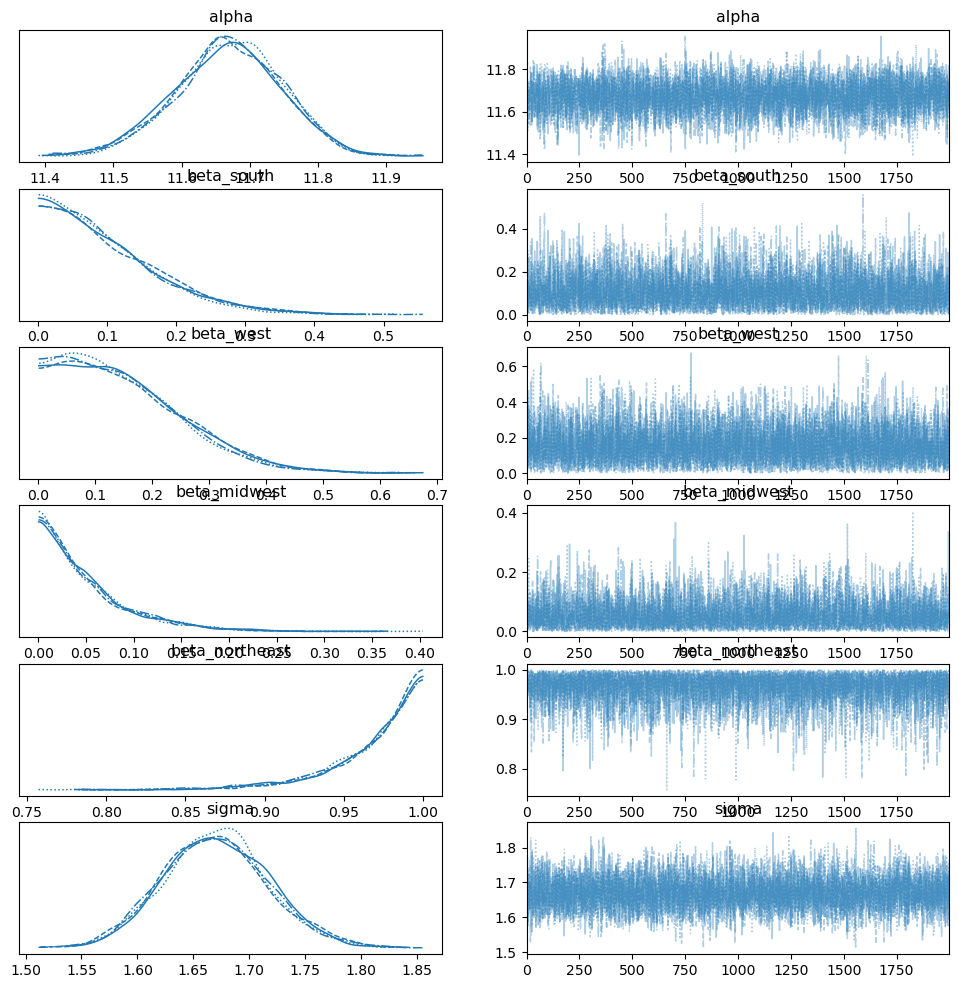

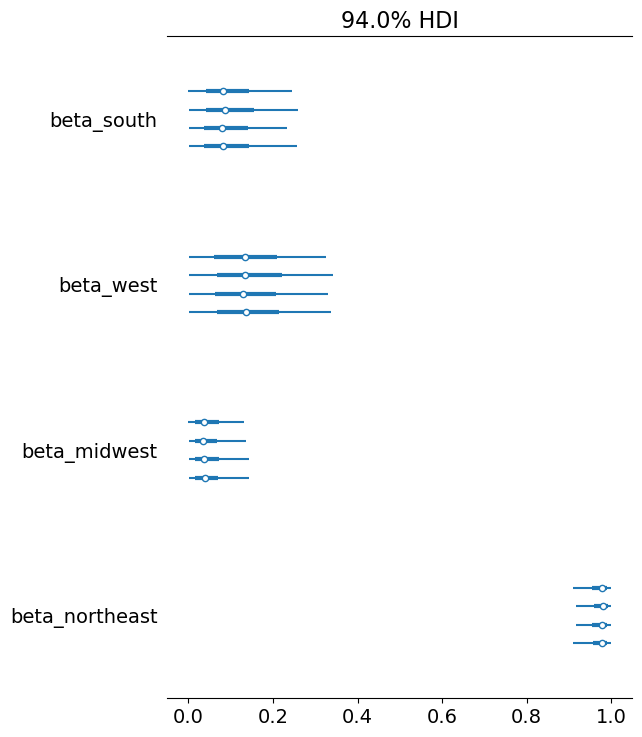

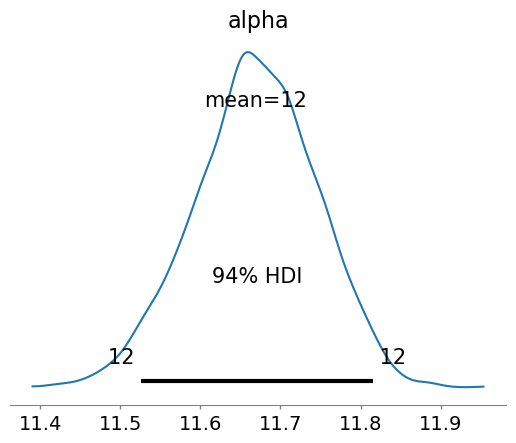

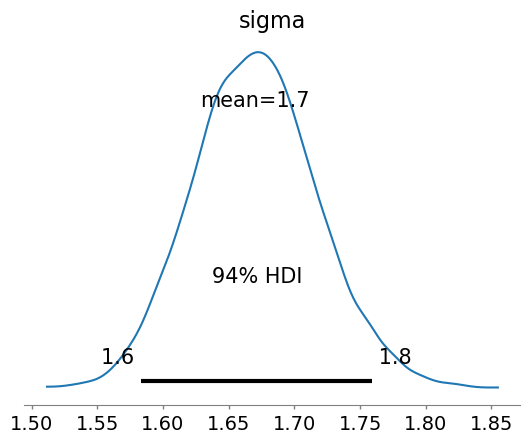

In [37]:
# Analyze results
az.summary(trace)

az.plot_trace(trace)

az.plot_forest(trace, var_names=['beta_south', 'beta_west', 'beta_midwest', 'beta_northeast'])

az.plot_posterior(trace, var_names=['alpha'])

pm.plot_posterior(trace, var_names=['sigma'])